In [2]:
import glob
import operator
import numpy as np
import xnetwork as xn
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator

In [4]:
# files = glob.glob('subset_chu/citation_*_180122_bardo_infomap_220322.xnet')

In [20]:
files = ['subset_chu/citation_net_nano lett._180122_bardo.xnet'] #_infomap_220322.xnet']
# files = glob.glob('subset_chu/citation_net_*_180122_bardo.xnet')
files = glob.glob('subset_chu/citation_net_*voting_schema.xnet') + ['subset_chu/citation_net_nat. mater._011122_voting_schema_bardo_infomap_01112022.xnet']

In [21]:
files

['subset_chu/citation_net_acs appl. mater. interfaces_voting_schema.xnet',
 'subset_chu/citation_net_acs nano_voting_schema.xnet',
 'subset_chu/citation_net_adv. funct. mater._voting_schema.xnet',
 'subset_chu/citation_net_adv. mater._voting_schema.xnet',
 'subset_chu/citation_net_chem. mat._voting_schema.xnet',
 'subset_chu/citation_net_j. am. chem. soc._voting_schema.xnet',
 'subset_chu/citation_net_j. mat. chem. b_voting_schema.xnet',
 'subset_chu/citation_net_j. mater. chem. a_voting_schema.xnet',
 'subset_chu/citation_net_j. mater. chem. c_voting_schema.xnet',
 'subset_chu/citation_net_j. mater. chem._voting_schema.xnet',
 'subset_chu/citation_net_langmuir_voting_schema.xnet',
 'subset_chu/citation_net_macromolecules_voting_schema.xnet',
 'subset_chu/citation_net_nano lett._voting_schema.xnet',
 'subset_chu/citation_net_nat. mater._voting_schema.xnet',
 'subset_chu/citation_net_nat. nanotechnol._voting_schema.xnet',
 'subset_chu/citation_net_nat. mater._011122_voting_schema_bardo_

In [4]:
def format_title_journal(name1):
    print(name1)
    name = name1.title()
    name = name.replace('Mater', 'Mat')
    name = name.replace('Acs', 'ACS')
    name = name.replace('Appl. Mat. Interfaces', 'AMI')
    return name

In [27]:
from collections import defaultdict
outputjson = dict()
for file in files:
    net_ami = xn.xnet2igraph(file)
    years = sorted(np.unique(net_ami.vs['year']))
    comms_size = defaultdict(lambda:[])

    name_unique = set(net_ami.vs['Cluster Name'])

    X = []
    for year in sorted(years):
        X.append(year)
        vertex_seq = net_ami.vs.select(year_eq=year)
        N = len(vertex_seq)
        subg  = net_ami.subgraph(vertex_seq)

        unique,count = np.unique(subg.vs['Cluster Name'], return_counts=True)
        for u,c in zip(unique, count):
            comms_size[u].append(100*c/N)

        for missing in name_unique - set(unique):
            comms_size[missing].append(0)

    
    labels = []
    hists = []
    others = []
    comms_size_sorted = dict(sorted(comms_size.items(), key = lambda x: x[0]))
    count_l = 0
    for label, hist in comms_size_sorted.items():
        count_l += 1
        if count_l > 9:
            others.append(hist)
#             continue
        else:
            labels.append(label[:60] + '\n' + label[60:120] + '\n' + label[120:])
            hists.append(hist)
        
    others = np.sum(others, axis=0)
    hists.append(others.tolist())
    labels.append('Others')
    cmap = plt.get_cmap("tab10")
    outer_colors = cmap(np.arange(9))
    
#     nat mater
#     labels = labels[:4] + [labels[-2], labels[4], labels[-3], labels[5], labels[6], labels[-1]]
#     hists = hists[:4] + [hists[-2], hists[4], hists[-3], hists[5], hists[6], hists[-1]]
    
#     labels = [labels[1], labels[0]] + labels[2:]
#     hists = [hists[1], hists[0]] + hists[2:]
    
    journal = format_title_journal(file[24:-19])
    if 'nat. mat._011122_voting_schema_bardo_in' in journal.lower():
        journal = 'Nat. Mat.'
    outer_colors = outer_colors.tolist()
    outer_colors.append([0.8, 0.8, 0.8, 1])
    outputjson[journal] = {'x': X, 'hist':hists, 'labels':labels, 'c':outer_colors}
import json
json_str = json.dumps(outputjson)
out = open('commsize_data_to_plot.json', 'w')
out.write(json_str)
out.close()

acs appl. mater. interfaces
acs nano
adv. funct. mater.
adv. mater.
chem. mat.
j. am. chem. soc.
j. mat. chem. b
j. mater. chem. a
j. mater. chem. c
j. mater. chem.
langmuir
macromolecules
nano lett.
nat. mater.
nat. nanotechnol.
nat. mater._011122_voting_schema_bardo_in


Adv. Funct. Mater.
ACS Appl. Mater. Interfaces


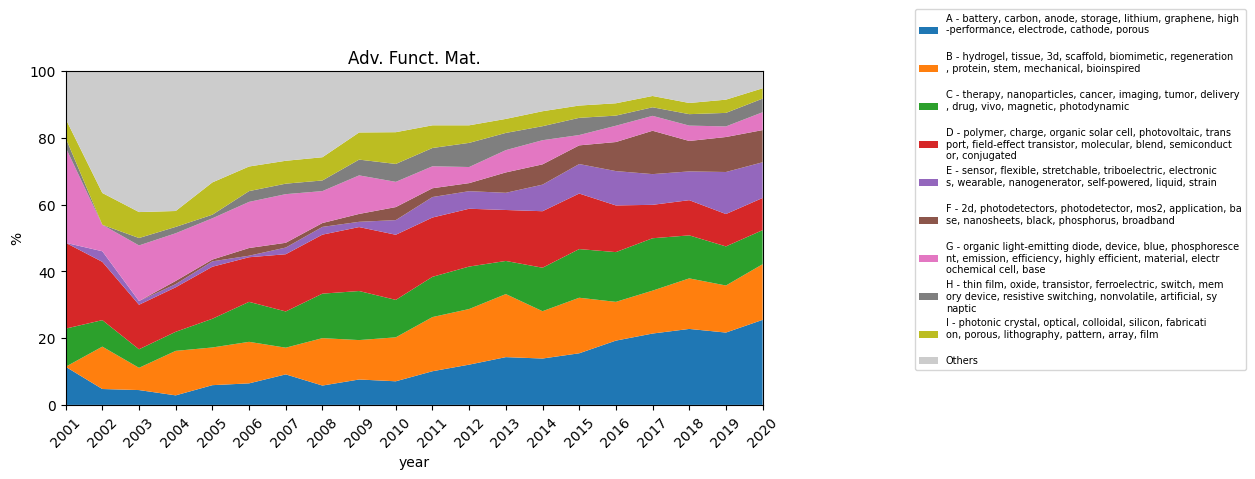

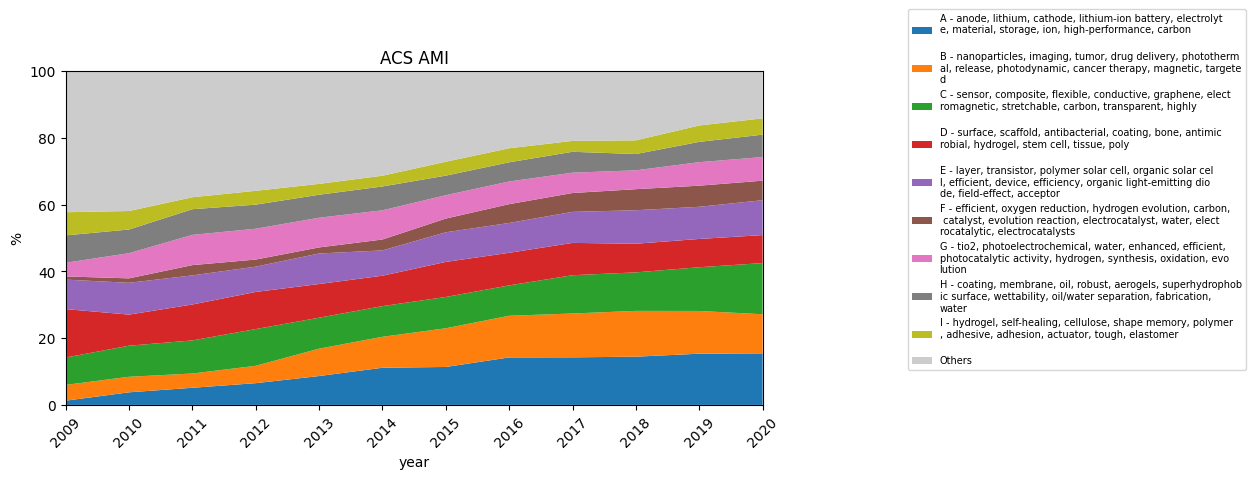

In [30]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from collections import defaultdict

files = ['Adv. Funct. Mater._completedata_110423_bardo_infomap_110423_voting_schema.xnet',
        'ACS Appl. Mater. Interfaces_completedata_110423_bardo_infomap_110423_voting_schema.xnet',
        ]
for file in files:
    net_ami = xn.xnet2igraph(file)
    years = sorted(np.unique(net_ami.vs['year']))
#     years = list(range(2000, 2021))
    comms_size = defaultdict(lambda:[])

    name_unique = set(net_ami.vs['cluster_top10'])

    X = []
    for year in sorted(years):
        X.append(year)
        vertex_seq = net_ami.vs.select(year_eq=year)
        N = len(vertex_seq)
        subg  = net_ami.subgraph(vertex_seq)

        unique,count = np.unique(subg.vs['cluster_top10'], return_counts=True)
        for u,c in zip(unique, count):
            comms_size[u].append(100*c/N)

        for missing in name_unique - set(unique):
            comms_size[missing].append(0)

    fg = plt.figure(figsize=(17,5))
    ax = fg.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    labels = []
    hists = []
    others = []
    comms_size_sorted = dict(sorted(comms_size.items(), key = lambda x: x[0]))
    count_l = 0
    for label, hist in comms_size_sorted.items():
        count_l += 1
        if count_l > 9:
            others.append(hist)
#             continue
        else:
            labels.append(label[:60] + '\n' + label[60:120] + '\n' + label[120:])
            hists.append(hist)
        
    others = np.sum(others, axis=0)
    hists.append(others)
    labels.append('Others')
    cmap = plt.get_cmap("tab10")
    outer_colors = cmap(np.arange(9))
    
    outer_colors = outer_colors.tolist()
    outer_colors.append([0.8, 0.8, 0.8, 1])
    plt.stackplot(X, *hists, labels=labels, colors=outer_colors)
    plt.margins(0,0)
    plt.xticks(years, rotation=45)
    plt.legend(prop={'size': 7}, bbox_to_anchor=(1.7,1.2))
    plt.ylabel('%')
    plt.xlabel('year')
    plt.title(format_title_journal(file.split('_')[0]))
    plt.tight_layout()
    plt.savefig(file.replace('.xnet', '_dist_020322.pdf'))
    